<a href="https://colab.research.google.com/github/KimuYounguWoo/algorithm_barkingDog/blob/main/%EC%9E%AC%EB%AC%B4%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 재무 데이터 핸들링

In [152]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 폰트 설정 (Matplotlib, Seaborn 그래프 표시 시, 한글 깨짐)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [153]:
from google.colab import drive
drive.mount('/content/drive')
# 드라이브 마운트

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
import sys
sys.path.append('/content/drive/MyDrive')

In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import os
# 데이터 분석 기초 라이브러리 임포트
from dateutil.relativedelta import relativedelta
# 날짜 계산을 위한 라이브러리
# now+relativedelta(years=-1) = 현재 - 1년

plt.style.use('seaborn')
# Matplotlib 그래프 스타일시트

FONT_NAME = font_manager.FontProperties(fname="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf").get_name()
rc('font', family=FONT_NAME)
# 폰트 사용

folder_dir = '/content/drive/MyDrive/simp_data'
DATA_FILE = "KRX300_FIN_DATA_2023.xlsx"
data_wb = pd.ExcelFile(folder_dir + "/" + DATA_FILE)
# 데이터 준비

<ipython-input-155-ab6afb05f450>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [156]:
find_ts = data_wb.parse("재무", index_col=3)  # 인덱스는 연도
# parse("sheetName", index_col = "기준이 될 열")

print(find_ts.head(16))
# 상위 16개만

       Symbol  Name  결산월           총자산           총부채           총자본  \
회계연도                                                                 
2007  A005930  삼성전자   12  9.337514e+10  3.740323e+10  5.597191e+10   
2008  A005930  삼성전자   12  1.053006e+11  4.237670e+10  6.292395e+10   
2009  A005930  삼성전자   12  1.121798e+11  3.913459e+10  7.304520e+10   
2010  A005930  삼성전자   12  1.342887e+11  4.493965e+10  8.934909e+10   
2011  A005930  삼성전자   12  1.558003e+11  5.448663e+10  1.013136e+11   
2012  A005930  삼성전자   12  1.810716e+11  5.959136e+10  1.214802e+11   
2013  A005930  삼성전자   12  2.140750e+11  6.405901e+10  1.500160e+11   
2014  A005930  삼성전자   12  2.304230e+11  6.233477e+10  1.680882e+11   
2015  A005930  삼성전자   12  2.421795e+11  6.311972e+10  1.790598e+11   
2016  A005930  삼성전자   12  2.621743e+11  6.921129e+10  1.929630e+11   
2017  A005930  삼성전자   12  3.017521e+11  8.726066e+10  2.144914e+11   
2018  A005930  삼성전자   12  3.393572e+11  9.160407e+10  2.477532e+11   
2019  A005930  삼성전자 

1.복수 재무지표 순위

In [157]:
ror= find_ts.iloc[:,3:] / find_ts.iloc[:,3:].shift(1) - 1    # 전년비 증감률
# 연도 열 다음부터 가장 마지막 열까지 선택
# 총 자산 ~ CFPS
# -----------------------------

# find_ts -> 열 선택
# iloc[:, 3:] -> 3 ~ 마지막 열
# -----------------------------

# find_ts -> 열 선택
# iloc[:, 3:] -> 3 ~ 마지막 열
# shift(1) -> 현재 행에서 이전 행, 1칸 위의 행
# -----------------------------

# tmp_data = find_ts.iloc[:, 3:]
# ror = tmp_data / tmp_data.shift(1) - 1
# 증감률
# -----------------------------
Name=find_ts['Name']
# 이름

ror = pd.concat([Name,ror],axis=1)
# 이름과 새롭게 만든 증감률 데이터를 합침

print(ror.head(5))



      Name       총자산       총부채       총자본       매출액      영업이익     당기순이익  \
회계연도                                                                     
2007  삼성전자       NaN       NaN       NaN       NaN       NaN       NaN   
2008  삼성전자  0.127716  0.132969  0.124206  0.231317 -0.327798 -0.256566   
2009  삼성전자  0.065329 -0.076507  0.160849  0.123908  0.820335  0.657079   
2010  삼성전자  0.197085  0.148336  0.223203  0.134288  0.513754  0.654264   
2011  삼성전자  0.160189  0.212440  0.133908  0.067073 -0.058765 -0.147864   

          현금흐름       EPS       BPS       SPS      CFPS  
회계연도                                                    
2007       NaN       NaN       NaN       NaN       NaN  
2008 -0.018659 -0.255328  0.102000  0.231316 -0.018661  
2009  0.325729  0.732127  0.163258  0.123908  0.325729  
2010  0.313076  0.650619  0.197278  0.134289  0.313076  
2011 -0.008025 -0.152946  0.120817  0.067072 -0.008024  


In [158]:
print(ror['매출액'])
# 전년대비 매출액의 증감 비율만 표기

회계연도
2007         NaN
2008    0.231317
2009    0.123908
2010    0.134288
2011    0.067073
          ...   
2018    0.110818
2019    0.059197
2020    0.100146
2021    0.298940
2022    0.675472
Name: 매출액, Length: 4784, dtype: float64


<Axes: xlabel='회계연도'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


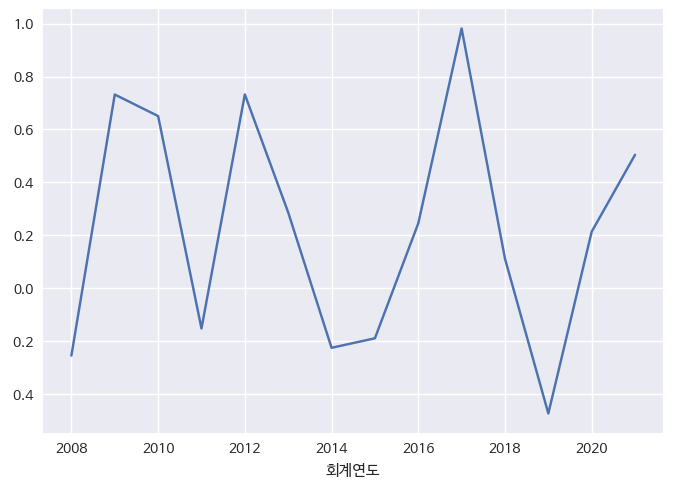

In [159]:
#  삼성전자 EPS 연간 상승률
EPS= ror[ror['Name']=='삼성전자']['EPS'][:-1]

# 내가 원하는 데이터를 그래프로
# TEST = ror[ror['Name'] == '원하는 기업 이름']['원하는 데이터'][:-1]

EPS.plot()

In [160]:
# 기간설정
rt=ror[(ror.index >= 2020) & (ror.index <= 2022)]
print(rt)

# rt.index = pd.to_datetime(rt.index, format = '%Y')
# rt.loc['2020':'2022']


        Name       총자산       총부채       총자본       매출액       영업이익       당기순이익  \
회계연도                                                                          
2020    삼성전자  0.072813  0.140534  0.049709  0.027804   0.296212    0.214775   
2021    삼성전자  0.127924  0.189989  0.104918  0.180729   0.434518    0.511198   
2022    삼성전자  0.051107 -0.230414  0.163495  0.080923  -0.159919    0.394579   
2020  SK하이닉스  0.090815  0.112768  0.082886  0.181903   0.843433    1.368705   
2021  SK하이닉스  0.353679  0.772951  0.198076  0.347876   1.475817    1.020669   
...      ...       ...       ...       ...       ...        ...         ...   
2021     메지온  0.109872  0.123587  0.105330 -0.069159   1.230596   -0.016388   
2022     메지온 -0.356382  0.314114 -0.582122  0.152785   0.388969    1.668433   
2020   한국비엔씨  0.363387  0.390872  0.341439  0.100146  -0.594162   -1.263690   
2021   한국비엔씨  0.992124  1.744069  0.369534  0.298940 -12.852577 -124.762617   
2022   한국비엔씨  0.726057 -0.495256  2.752176  0.675472

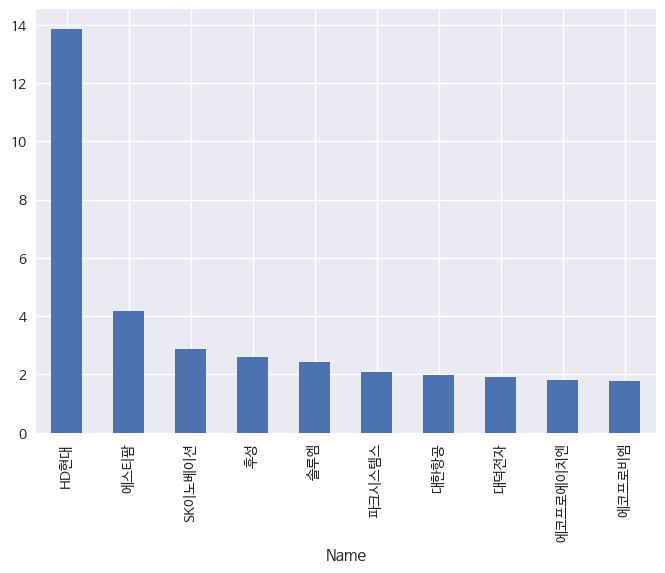

In [235]:
#  특정 연도 선택
finy=ror[(ror.index ==2022) ]


fn=finy[ (finy['매출액']> 0.3) & (finy['당기순이익']>0.2)][['Name','매출액','당기순이익']]
# 2022년도에, 매출액 증감비율이 0.3보다 크고, 당기 순이익 증감 비율이 0.2보다 큰 행의 이름, 매출액, 당기 순이익의 데이터프레임 설정

# 당기 순이익: 기업이 일정 기간 동안 얻은 모든 수익에서 지출한 모든 비용을 공제하고 순수하게 이익으로 남은 몫
# 이 데이터에서는 해당 년도

# 현재 데이터는 실제 데이터가 아닌, 증감율로 처리를 했으니, 컬럼명을 재설정해준다.
fnn=fn.rename({'매출액': '매출액증가율', '당기순이익': '당기순이익증가율'}, axis=1)

# 당기 순이익 증가율이 높은 순서대로, 새롭게 정렬
ps = fnn.sort_values(ascending=False, by='당기순이익증가율')[:10]

# 이 데이터는 2022년도 기준의 행을 가져왔기에, 첫 번째 인덱스가 년도 -> 그래프도 연도로 설정되기 때문에 인덱스를 바꿔줘야 함.
pss=ps.set_index('Name')
pss['당기순이익증가율'].plot.bar()

pd.set_option('mode.chained_assignment',  None)



In [237]:
a1 = finy.sort_values(ascending=False, by = '영업이익')[:10][['Name', '영업이익']]
a1

,Name,영업이익
회계연도,,
2022,화승엔터프라이즈,6.437725
2022,에코프로,6.134114
2022,아시아나항공,5.424256
2022,위지윅스튜디오,5.299607
2022,자이언트스텝,5.140746
2022,엘앤에프,5.018253
2022,한국전력,4.585420
2022,SK디스커버리,3.870864
2022,SK가스,2.702468


In [238]:
a2 = find_ts[['Name', '당기순이익', '총자본']]
a2['ROE'] = a2['당기순이익'] / a2['총자본'] *100

a2 = a2.rolling(3).mean()
name=find_ts['Name']
a2 = pd.concat([name,a2],axis=1)

a2 = a2[a2['ROE'] >= 20]
a2 = a2[a2.index == 2022]

a2 = a2.sort_values(ascending=False, by='ROE')[:10][['Name', 'ROE']]
a2

<ipython-input-238-5a297aebe68e>:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Name'], dtype='object')
  a2 = a2.rolling(3).mean()


,Name,ROE
회계연도,,
2022,에스디바이오센서,53.880765
2022,씨젠,47.768807
2022,메리츠화재,47.070270
2022,HMM,35.872452
2022,심텍,30.263852
2022,클래시스,30.142475
2022,DB하이텍,27.885506
2022,아프리카TV,27.696375
2022,피엔티,27.600005


In [239]:
a3 = finy.sort_values(ascending=False, by = 'CFPS')[:10][['Name', 'CFPS']]
a3

,Name,CFPS
회계연도,,
2022,자이언트스텝,48.908922
2022,하나투어,6.387521
2022,한진칼,4.422795
2022,위지윅스튜디오,4.015564
2022,HD현대,2.963623
2022,CJ CGV,2.553454
2022,영진약품,2.372771
2022,메지온,1.877762
2022,강원랜드,1.816565


In [240]:
a4 = finy[['Name', '매출액', '영업이익']]
a4 = a4[(a4['매출액'] >= 0.3) & (a4['영업이익'] >= 0.2)]
a4 = a4.sort_values(ascending=False, by = '매출액')[:10][['Name', '매출액', '영업이익']]
a4

,Name,매출액,영업이익
회계연도,,,
2022,엘앤에프,3.004378,5.018253
2022,에코프로,2.749351,6.134114
2022,에코프로비엠,2.606290,2.309333
2022,에코프로에이치엔,1.400740,1.984853
2022,DL,1.193915,0.488177
2022,HD현대,1.146095,2.267457
2022,삼성바이오로직스,0.914083,0.830654
2022,한국가스공사,0.879465,0.987112
2022,JYP Ent.,0.783873,0.668830


In [241]:
a5 = finy[['Name', '매출액', '당기순이익']]
a5['순이익률'] = finy['당기순이익'] / finy['매출액']
a5 = a5.sort_values(ascending=False, by = '순이익률')[:10][['Name', '순이익률']]
a5

,Name,순이익률
회계연도,,
2022,더블유게임즈,221.629925
2022,SK아이이테크놀로지,44.060330
2022,펄어비스,38.447649
2022,HDC현대산업개발,36.667034
2022,현대로템,27.495866
2022,LG디스플레이,27.232412
2022,레고켐바이오,23.770450
2022,한샘,21.763102
2022,한국전력,21.117520


In [162]:
# 특정 재무지표에 따라 순위 매겨  재무지표출력
pt = finy.sort_values(ascending=False, by='영업이익')[:10][['Name','매출액','당기순이익','영업이익']]
# 영업 이익이 높은 순으로 정렬
# 영업 이익: 순수 영업을 통해서 얻은 이익만 ( 매출 - (생산 비용 - 인건비 - ,,, 등) )
# 당기 순이익: 영업 외 이익 및 손해를 모두 포함한 이익
pt

,Name,매출액,당기순이익,영업이익
회계연도,,,,
2022,화승엔터프라이즈,0.452719,0.100983,6.437725
2022,에코프로,2.749351,-0.208104,6.134114
2022,아시아나항공,0.430205,-1.051326,5.424256
2022,위지윅스튜디오,0.549209,0.488131,5.299607
2022,자이언트스텝,0.225074,2.651509,5.140746
2022,엘앤에프,3.004378,-3.414081,5.018253
2022,한국전력,0.174446,3.683871,4.585420
2022,SK디스커버리,0.317914,0.961248,3.870864
2022,SK가스,0.241997,0.031339,2.702468


In [163]:
# 쿼리문과 같은 방식으로, 정보를 얻어냄
ff=finy.query('매출액>0.5 & 당기순이익>0.5')[['Name','당기순이익','매출액']]
ff.sort_values(ascending=False, by='당기순이익')


,Name,당기순이익,매출액
회계연도,,,
2022,HD현대,13.842722,1.146095
2022,에스티팜,4.186170,0.505184
2022,SK이노베이션,2.879510,0.665982
2022,후성,2.594612,0.601452
2022,대한항공,1.988176,0.563310
2022,에코프로에이치엔,1.817552,1.400740
2022,에코프로비엠,1.788159,2.606290
2022,삼성바이오로직스,1.027636,0.914083
2022,F&F,0.960763,0.660798


In [164]:
fina3 = ror.rolling(3).mean()

# rolling(window) = window 크기만큼의 평균을 구하는 함수
# [1, 2, 3, 4, 5, 6, 7, 8, 9].rolling(3)
# [nan, nan, 2, 3, 4, 5, 6, 7, 8]
# 앞 2개는 데이터가 부족하기 때문에, NaN 표시
# rolling은 기초적으로 숫자만 계산하기에, 숫자가 아닌 Name은 결과에서 제외됨

fina3

<ipython-input-164-d6cdc6f0e7f8>:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Name'], dtype='object')
  fina3 = ror.rolling(3).mean()


,총자산,총부채,총자본,매출액,영업이익,당기순이익,현금흐름,EPS,BPS,SPS,CFPS
회계연도,,,,,,,,,,,
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,0.130043,0.068266,0.169419,0.163171,0.335430,0.351592,0.206715,0.375806,0.154179,0.163171,0.206715
2011,0.140867,0.094756,0.172653,0.108423,0.425108,0.387826,0.210260,0.409934,0.160451,0.108423,0.210260
...,...,...,...,...,...,...,...,...,...,...,...
2018,0.231543,0.278307,0.166070,0.162503,0.523301,1.257599,0.476467,1.221927,0.155547,0.103487,0.437579
2019,0.355898,0.211207,0.612685,0.125560,0.432340,0.367794,-0.168463,0.358147,0.714887,0.111579,-0.175476
2020,0.423288,0.293111,0.664280,0.090054,-0.211530,-1.584200,-1.392019,-1.576395,0.735699,0.073303,-1.386465


<ipython-input-165-8689b8d02f22>:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Name'], dtype='object')
  fina=ror.rolling(3).mean()


<Axes: xlabel='Name'>

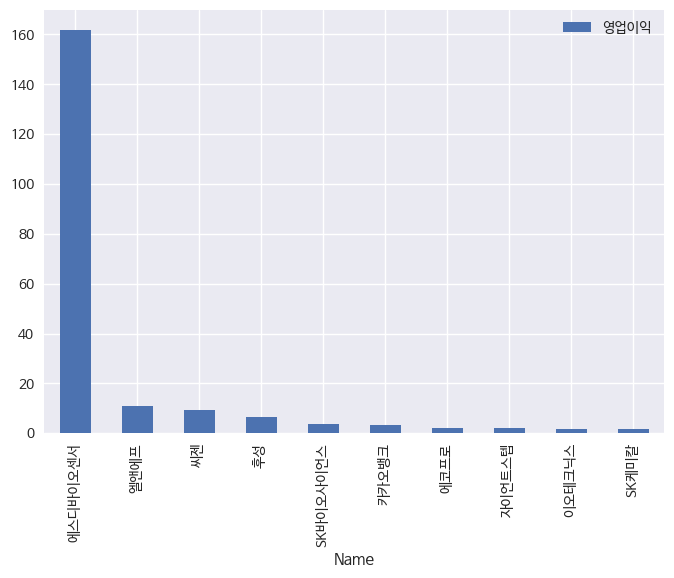

In [165]:
# 3년 평균 / 3년 추세

fina=ror.rolling(3).mean()
# 3년동안의 평균을 계산

name=find_ts['Name']
# Name을 계산결과에 추가하기 위해, 따로 빼놓기

rorm = pd.concat([name,fina],axis=1)
# 합치기

rorm=rorm[rorm.index==2022]
# 최종 결과에서 2022년도만 빼오기

# 조건 추출
ra=rorm.query('매출액>0.2 & 영업이익>0.1')[['Name','영업이익','매출액']]
ra=ra.sort_values(ascending=False,by ='영업이익')[:10]

raa=ra.set_index('Name')
raa[['영업이익']].plot.bar()




<Axes: xlabel='Name'>

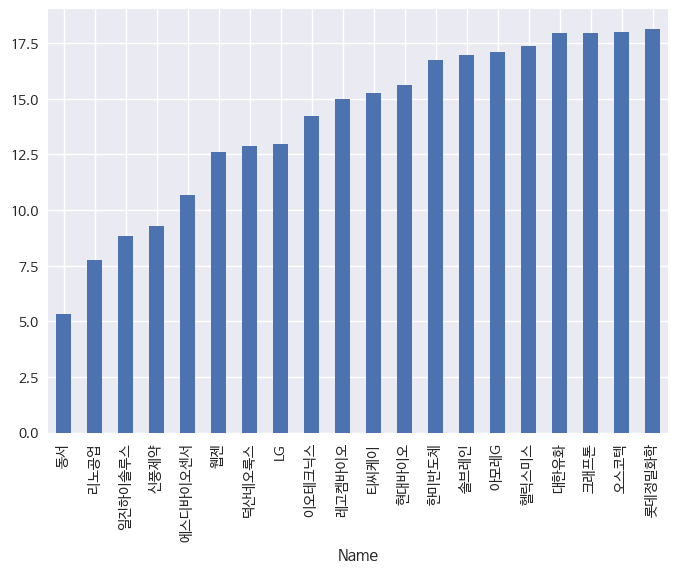

In [166]:
# 재무비율 산정 :  특정 연도 부채비율

find_ts['부채비율']=find_ts ['총부채']/find_ts ['총자본']*100
# 원 데이터에, '부채비율'이라는 열을 생성하고, 그 값은 (총 부채 / 총 자본) * 100

find_2022= find_ts [(find_ts.index ==2022)]
# 2022년만을 가지는 데이터

#  랭킹 상위 20위  막대그래프로 그리기
dratio = find_2022.sort_values(ascending=True, by='부채비율')[:20]
debt=dratio.set_index('Name')

# 인덱스 변경 및 부채 비율이 낮으면 좋은 것
debt['부채비율'].plot.bar()


<Axes: xlabel='Name'>

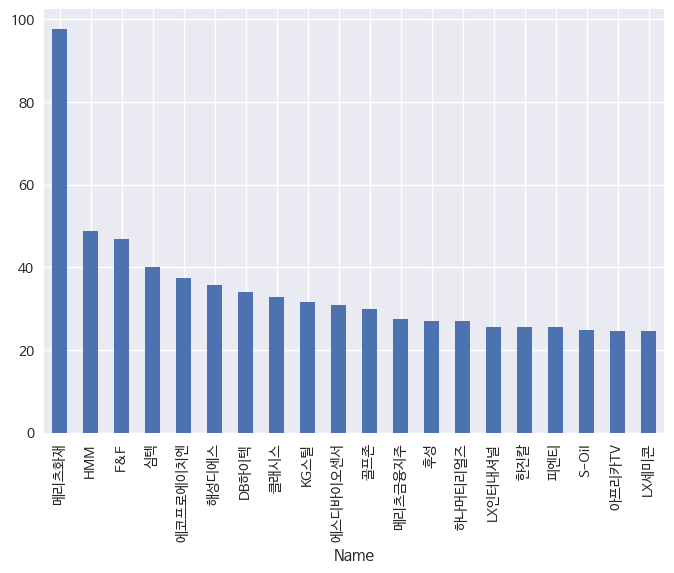

In [167]:
# 재무비율 산정 : 특정연도 자기자본이익률(ROE)
# 재무비율 -> 가지고 있는 돈으로 얼마나 효율적으로 이익을 올렸는 가?
# 당기 순이익 / 자기 자본
# 순이익률 * 회전율 * 레버리지

find_ts['ROE']=find_ts ['당기순이익']/find_ts["총자본"]*100
# ROE 열을 만들고, 채워주자

find_2022= find_ts[(find_ts.index ==2022)]
# 2022년도의 행들만

# 랭킹 20위 찾기
ratio = find_2022.sort_values(ascending=False, by='ROE')[:20]
ROE=ratio.set_index('Name')
ROE['ROE'].plot.bar()

In [168]:
# 삼성전자 ROE를 찾아보자.
print(find_2022[find_2022.Name=='삼성전자']['ROE'])

def find_year_stock(year):
  return find_ts[(find_ts.index == year)]

def find_roe_stock_year(name, year):
  data = find_year_stock(year)
  return data[data.Name==name]['ROE']

nn = 'HMM'
yy = 2021
print(f'{nn}의 {yy}년도, ROE = {find_roe_stock_year(nn, yy)}')

회계연도
2022    15.68827
Name: ROE, dtype: float64
HMM의 2021년도, ROE = 회계연도
2021    51.525386
Name: ROE, dtype: float64
